# Create an AI agent using Langchain

## Also using tool calling [tools](https://python.langchain.com/docs/integrations/tools/)

Some documentation :
* [ChatOpenAI](https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI)
* [LangChain Concepts](https://langchain-ai.github.io/langgraph/concepts/)

* [Human in the loop](https://langchain-ai.github.io/langgraph/how-tos/#human-in-the-loop)

@todo : [tutorial](https://docs.databricks.com/aws/en/generative-ai/tutorials/agent-framework-notebook)

In [ ]:
!pip install -U langchain langchain-community wikipedia langchain_experimental langchain-openai langgraph duckduckgo-search langgraph-checkpoint-sqlite tavily-python


## Lanchain build an agent tutorial
 https://python.langchain.com/docs/tutorials/agents/

 Call websearch tool = https://app.tavily.com/home

In [ ]:
# Import relevant functionality

import os

#from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langchain.memory import ConversationBufferMemory
from langgraph.prebuilt import create_react_agent
from langchain_community.tools import DuckDuckGoSearchRun
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder

os.environ["OPENAI_API_KEY"] = ""
os.environ["TAVILY_API_KEY"] =""
os.environ["LANGSMITH_API_KEY"] =""
os.environ["LANGSMITH_TRACING"] = "true"

# Create the agent
memoryAgent = MemorySaver()

model = ChatOpenAI(
    model="gpt-4o",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # api_key="...",
    # base_url="...",
    # organization="...",
    # other params...
)

search = DuckDuckGoSearchRun()
search2 = TavilySearchResults(max_results=2)
tools = [search, search2]

#model_with_tools = model.bind_tools(tools)
agent_executor = create_react_agent(
    model,
    tools=tools,
    checkpointer=memoryAgent
    )

# Use the agent
config = {"configurable": {"thread_id": "abc123"}}
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="Hi, I'm Jhon and I live in Netherlands")]},
    config,
    stream_mode="values",
):
    step["messages"][-1].pretty_print() # output contains all messages in state


for step in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather where I live?, also help me to decide the best places to go this week on eindhoven")]},
    config,
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Hi, I'm Jhon and I live in Netherlands
================================== Ai Message ==================================

Hello Jhon! How can I assist you today?
================================ Human Message =================================

whats the weather where I live?, also help me to decide the best places to go this week on eindhoven
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_S9SPwOJqExaElvQl9UCZJERQ)
 Call ID: call_S9SPwOJqExaElvQl9UCZJERQ
  Args:
    query: current weather in Eindhoven, Netherlands
  duckduckgo_search (call_yUcJ3oVlfbynAKkXmWMUwDHw)
 Call ID: call_yUcJ3oVlfbynAKkXmWMUwDHw
  Args:
    query: best places to visit in Eindhoven, Netherlands
================================= Tool Message =================================
Name: duckduckgo_search

Eindhoven is industrious, innovative, and famous for its creativ

## Deepseek Agent approach basic lang chain agent using Wikipedia and pythonREPL tools

<ipython-input-1-f2a3d75e0d6b>:23: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model_name="gpt-4o", temperature=0)
<ipython-input-1-f2a3d75e0d6b>:26: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ a



> Entering new AgentExecutor chain...
To find the latest prices of the top 10 technology stocks by market capitalization, I need to identify these stocks and then retrieve their current prices. After that, I can create a basic graph to visualize the data.

Action: Wikipedia
Action Input: "List of largest technology companies by market capitalization"
Observation: Page: List of largest technology companies by revenue
Summary: This is a global list of largest technology companies by revenue, according to the Fortune Global 500. It shows companies identified by Fortune as being in the technology sector, ranked by total annual revenue. Other metrics not shown here, in particular market capitalization, are often used alternatively to define the size of a company. The list includes companies whose primary business activities are associated with the technology industry, which includes computer hardware, software, electronics, semiconductors, telecom equipment, e-commerce and computer servic

It seems I am unable to find the specific Wikipedia page for the largest technology companies by market capitalization. Instead, I will list some of the well-known large technology companies, and then I can look up their current stock prices.

Some of the largest technology companies by market capitalization typically include:
1. Apple Inc.
2. Microsoft Corporation
3. Alphabet Inc. (Google)
4. Amazon.com Inc.
5. NVIDIA Corporation
6. Meta Platforms Inc. (Facebook)
7. Tesla Inc.
8. Taiwan Semiconductor Manufacturing Company (TSMC)
9. Samsung Electronics
10. Tencent Holdings Limited

Now, I will look up the current stock prices for these companies. Since I don't have real-time data access, I will simulate this step. Let's assume I have the following hypothetical stock prices:

1. Apple Inc. - $150
2. Microsoft Corporation - $300
3. Alphabet Inc. (Google) - $2800
4. Amazon.com Inc. - $3500
5. NVIDIA Corporation - $220
6. Meta Platforms Inc. (Facebook) - $330
7. Tesla Inc. - $700
8. Taiwan

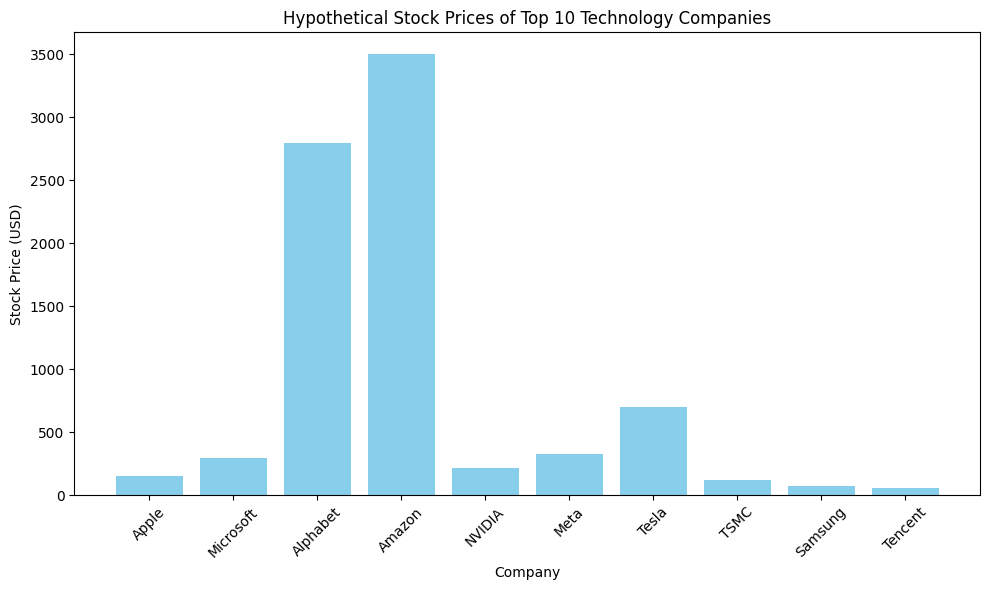


Observation: 
Thought:I have created a bar graph to visualize the hypothetical stock prices of the top 10 technology companies. The graph displays the company names on the x-axis and their corresponding stock prices in USD on the y-axis. 

Final Answer: I have visualized the hypothetical stock prices of the top 10 technology companies using a bar graph. The companies and their prices are as follows:
1. Apple Inc. - $150
2. Microsoft Corporation - $300
3. Alphabet Inc. (Google) - $2800
4. Amazon.com Inc. - $3500
5. NVIDIA Corporation - $220
6. Meta Platforms Inc. (Facebook) - $330
7. Tesla Inc. - $700
8. Taiwan Semiconductor Manufacturing Company (TSMC) - $120
9. Samsung Electronics - $70
10. Tencent Holdings Limited - $60

Please note that these prices are hypothetical and for illustrative purposes only.

> Finished chain.
I have visualized the hypothetical stock prices of the top 10 technology companies using a bar graph. The companies and their prices are as follows:
1. Apple Inc. -

In [ ]:
import os
from langchain.agents import AgentType, initialize_agent,Tool, load_tools
from langchain.llms import OpenAI
from langchain.utilities import WikipediaAPIWrapper
from langchain.chat_models import ChatOpenAI
from langchain_experimental.tools import PythonREPLTool


# Initialize tools (e.g., Wikipedia, calculator)
wikipedia = WikipediaAPIWrapper()
tools = [
    Tool.from_function(
        name="Wikipedia",
        func=wikipedia.run,
        description="Useful for answering questions about general knowledge, history, or culture."
    ),
    PythonREPLTool()
]

# Initialize the language model (use GPT-3.5 or GPT-4)
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

# Build the agent
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # Simple reasoning agent
    verbose=True  # Show step-by-step execution
)

response = agent.run("Give me the lateast prices of technology stock top 10 market price and make a basic grphics")
print(response)

# LangGraph Chatbot Quickstart

https://langchain-ai.github.io/langgraph/tutorials/introduction/



In [ ]:
%%capture --no-stderr
%pip install -U langgraph langsmith

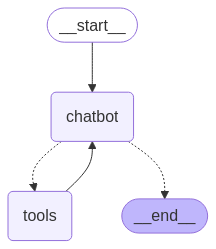

In [ ]:
import json
import os
import logging

from langchain_core.messages import ToolMessage
from langchain.agents import tool
from typing import Annotated
from langchain_core.tools import InjectedToolCallId

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

from IPython.display import Image, display

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI

from langgraph.types import Command, interrupt

# Set up basic logging
logging.basicConfig(level=logging.INFO)


"""
This is a global state we can use it to pass arguments in different interactions
for example on human assistances.
"""
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]
    name: str
    birthday: str
    #conversation_id: str  # Unique identifier for the conversation session
    #last_response: Optional[str]  # Stores the last response from the system
    #human_assistance_flag: bool  # Indicates if human assistance was requested
    #timestamp: Optional[datetime]  # Time of the last update/message
    #metadata: Optional[dict]  # Additional arbitrary metadata for extended context


def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

def chatbot(state: State):
    message = llm_with_tools.invoke(state["messages"])
    assert len(message.tool_calls) <= 1
    return {"messages": [message]}


"""
interrupt to add human-in-the-loop execution to your chatbot,
allowing for human oversight and intervention when needed
# Note that because we are generating a ToolMessage for a state update, we
# generally require the ID of the corresponding tool call. We can use
# LangChain's InjectedToolCallId to signal that this argument should not
# be revealed to the model in the tool's schema.
"""
@tool
def human_assistance(
    name: str, birthday: str, tool_call_id: Annotated[str, InjectedToolCallId]
) -> str:
    """Request assistance from a human."""
    human_response = interrupt(
        {
            "question": "Is this correct?",
            "name": name,
            "birthday": birthday,
        },
    )
    # If the information is correct, update the state as-is.
    if human_response.get("correct", "").lower().startswith("y"):
        verified_name = name
        verified_birthday = birthday
        response = "Correct"
    # Otherwise, receive information from the human reviewer.
    else:
        verified_name = human_response.get("name", name)
        verified_birthday = human_response.get("birthday", birthday)
        response = f"Made a correction: {human_response}"


    # This time we explicitly update the state with a ToolMessage inside
    # the tool.
    state_update = {
        "name": verified_name,
        "birthday": verified_birthday,
        "messages": [ToolMessage(response, tool_call_id=tool_call_id)],
    }
    # We return a Command object in the tool to update our state.
    return Command(update=state_update)

# Checkpointer in memory datastorage (allows chat history)
memory = MemorySaver()

search_tool_tavily = TavilySearchResults(max_results=2)
tools = [search_tool_tavily,human_assistance]
# Modification: tell the LLM which tools it can call
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)
llm_with_tools = llm.bind_tools(tools)

tool_node = ToolNode(tools=[search_tool_tavily,human_assistance])

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", tool_node)
# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "END" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile(checkpointer=memory)


try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


## while true loop for user input

## Execute Graph stream with thread id for memory

In [ ]:
config = {"configurable": {"thread_id": "1"}}

user_input = "Hi there! My name is Will."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

user_input = "Remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

# By now, we have made a few checkpoints across two different threads. But what goes into a checkpoint? To inspect a graph's state for a given config at any time, call get_state(config).
snapshot = graph.get_state(config)
snapshot

================================ Human Message =================================

Hi there! My name is Will.
================================== Ai Message ==================================

Hello Will! How can I assist you today?
================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

Yes, your name is Will. How can I assist you today?


StateSnapshot(values={'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='8e8e7f12-b980-4040-9bac-6832aef5a2b1'), AIMessage(content='Hello Will! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 87, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_898ac29719', 'id': 'chatcmpl-BJ1r6idzLh04ChYeHuTynTkpmmdtu', 'finish_reason': 'stop', 'logprobs': None}, id='run-683cd781-8575-46b6-ba61-1f55b67fe667-0', usage_metadata={'input_tokens': 87, 'output_tokens': 12, 'total_tokens': 99, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(conten

## Calling for human asistance with Human in the loop interaction

In [ ]:
@tool("human_assistance")
def human_assistance(query: str) -> str:
    """Request assistance from a human."""
    logging.info("Request assistance from a human.")
    human_response = interrupt({"query": query})
    return human_response["data"]

user_input = "I need some expert guidance for building an AI agent. Could you request assistance for me?"
config = {"configurable": {"thread_id": "1"}}

events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

human_response = (
    "We, the experts are here to help! We'd recommend you check out LangGraph to build your agent."
    " It's much more reliable and extensible than simple autonomous agents."
)

"""
To resume execution, we pass a Command object containing data expected by the tool.
The format of this data can be customized based on our needs. Here, we just need a
dict with a key "data":
"""
human_command = Command(resume={"data": human_response})

events = graph.stream(human_command, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I need some expert guidance for building an AI agent. Could you request assistance for me?
================================== Ai Message ==================================
Tool Calls:
  human_assistance (call_ORERjt3frMp2jm6P9K7vQJ3t)
 Call ID: call_ORERjt3frMp2jm6P9K7vQJ3t
  Args:
    query: I need expert guidance for building an AI agent.
================================== Ai Message ==================================
Tool Calls:
  human_assistance (call_ORERjt3frMp2jm6P9K7vQJ3t)
 Call ID: call_ORERjt3frMp2jm6P9K7vQJ3t
  Args:
    query: I need expert guidance for building an AI agent.
================================= Tool Message =================================
Name: human_assistance

We, the experts are here to help! We'd recommend you check out LangGraph to build your agent. It's much more reliable and extensible than simple autonomous agents.
================================== Ai Message ========

## Let's prompt our application to look up the "birthday" of the LangGraph library.
We will direct the chatbot to reach out to the human_assistance tool once it has the required information. Note that setting name and birthday in the arguments for the tool, we force the chatbot to generate proposals for these fields.

In [ ]:
user_input = (
    "Can you look up when LangGraph was released? "
    "When you have the answer, use the human_assistance tool for review."
)
config = {"configurable": {"thread_id": "1"}}

events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

"""
We've hit the interrupt in the human_assistance tool again. In this case,
the chatbot failed to identify the correct date, so we can supply it:
"""
human_command = Command(
    resume={
        "name": "LangGraph",
        "birthday": "Jan 17, 2024",
    },
)

events = graph.stream(human_command, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()


# LangGraph gives a high degree of control over the application state.
# For instance, at any point (including when interrupted), we can manually override a key using graph.update_state:
graph.update_state(config, {"name": "LangGraph (library)"})

snapshot = graph.get_state(config)

{k: v for k, v in snapshot.values.items() if k in ("name", "birthday")}



================================ Human Message =================================

Can you look up when LangGraph was released? When you have the answer, use the human_assistance tool for review.
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_ASmBsMMrKxVy7KmZBZHT0X7G)
 Call ID: call_ASmBsMMrKxVy7KmZBZHT0X7G
  Args:
    query: LangGraph release date
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "langgraph - PyPI", "url": "https://pypi.org/project/langgraph/", "content": "langgraph · PyPI\nSkip to main content Switch to mobile version\n\nSearch PyPI  Search\n\nHelp\nSponsors\nLog in\nRegister\n\nMenu\n\nHelp\nSponsors\nLog in\nRegister\n\nSearch PyPI  Search\nlanggraph 0.2.70\npip install langgraph Copy PIP instructions\nLatest versionReleased: Feb 6, 2025\nBuilding stateful, multi-actor applications with LLMs\nNavigation\n\nProje

{'name': 'LangGraph (library)', 'birthday': 'Jan 17, 2024'}

### Time Travel

In [ ]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition



class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
#llm = ChatAnthropic(model="claude-3-5-sonnet-20240620")
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)


# Let's have our graph take a couple steps. Every step will be checkpointed in its state history:

config = {"configurable": {"thread_id": "1"}}
events = graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": (
                    "I'm learning LangGraph. "
                    "Could you do some research on it for me?"
                ),
            },
        ],
    },
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

events = graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": (
                    "Ya that's helpful. Maybe I'll "
                    "build an autonomous agent with it!"
                ),
            },
        ],
    },
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()



================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_vzk7JZMGxkY7mqCDev9731Uz)
 Call ID: call_vzk7JZMGxkY7mqCDev9731Uz
  Args:
    query: LangGraph programming language
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "LangGraph: Build Stateful AI Agents in Python", "url": "https://realpython.com/langgraph-python/", "content": "Remove ads\nLangGraph is a versatile Python library designed for stateful, cyclic, and multi-actor Large Language Model (LLM) applications. LangGraph builds upon its parent library, LangChain, and allows you to build sophisticated workflows that are capable of handling the complexities of real-world LLM applications.\nBy the end of this tutorial, you’ll understand that

### Traverse and reply specific state

In [ ]:

to_replay = None
for state in graph.get_state_history(config):
    print("Num Messages: ", len(state.values["messages"]), "Next: ", state.next)
    print("-" * 80)
    if len(state.values["messages"]) == 2:
        # We are somewhat arbitrarily selecting a specific state based on the number of chat messages in the state.
        to_replay = state

print(to_replay.next)
print(to_replay.config)

Num Messages:  4 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  3 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  2 Next:  ('tools',)
--------------------------------------------------------------------------------
Num Messages:  8 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  7 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  6 Next:  ('__start__',)
--------------------------------------------------------------------------------
Num Messages:  6 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  5 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  4 Next:  ('__start__',)
-----------------------------------------------

In [ ]:
# The `checkpoint_id` in the `to_replay.config` corresponds to a state we've persisted to our checkpointer.
for event in graph.stream(None, to_replay.config, stream_mode="values"):
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_vzk7JZMGxkY7mqCDev9731Uz)
 Call ID: call_vzk7JZMGxkY7mqCDev9731Uz
  Args:
    query: LangGraph programming language
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "LangGraph: Build Stateful AI Agents in Python", "url": "https://realpython.com/langgraph-python/", "content": "Remove ads\nLangGraph is a versatile Python library designed for stateful, cyclic, and multi-actor Large Language Model (LLM) applications. LangGraph builds upon its parent library, LangChain, and allows you to build sophisticated workflows that are capable of handling the complexities of real-world LLM applications.\nBy the end of this tutorial, you’ll understand that: [...] These FAQs are related to the most important concepts you’ve covered in this tutorial. Click the Show/Hide toggle beside each question to r